The purpose of this project is to detect bogus of ID card using computer vision.

In [2]:
#import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [3]:
#Make folders and subfolders for storing images
!mkdir id_card_bogus
!mkdir id_card_bogus/image

In [4]:
#ID card from different sources
oryginal = Image.open(requests.get('https://d-art.ppstatic.pl/kadry/k/r/1/1e/c0/5c702f9323590_o_large.jpg', stream=True).raw)
bogus = Image.open(requests.get('https://i1.kwejk.pl/k/obrazki/2016/12/4b4e3f9f41d5de3656fa6de8e398d1b4.jpg', stream=True).raw)

In [5]:
print("Oryginal image size : ",oryginal.size)
print("Bogus image size : ",bogus.size)

Oryginal image size :  (672, 424)
Bogus image size :  (610, 431)


In [6]:
print("Oryginal image format : ",oryginal.format)
print("Bogus image format : ", bogus.format)

Oryginal image format :  JPEG
Bogus image format :  JPEG


In [7]:
#Convert the format of bogus image similar to original image.
oryginal = oryginal.resize((250, 160))
print(oryginal.size)
oryginal.save('id_card_bogus/image/oryginal.png')

(250, 160)


In [8]:
bogus = bogus.resize((250, 160))
print(bogus.size)
bogus.save('id_card_bogus/image/bogus.png')

(250, 160)


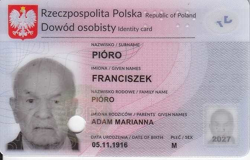

In [9]:
oryginal

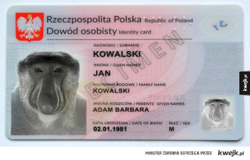

In [10]:
bogus

In [11]:
oryginal = cv2.imread('id_card_bogus/image/oryginal.png')
bogus = cv2.imread('id_card_bogus/image/bogus.png')

In [12]:
#change the images to greyscale which has only 1 channel so it is easyer to understand by machine
oryginal_grey = cv2.cvtColor(oryginal, cv2.COLOR_BGR2GRAY)
bogus_grey = cv2.cvtColor(bogus, cv2.COLOR_BGR2GRAY)

In [13]:
#find the similarity strucural index (SSIM) between this two images
(score, diff) = structural_similarity(oryginal_grey, bogus_grey, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score*100))

SSIM: 21.705785488749104


In [14]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [17]:
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(oryginal, (x,y), (x+w, y+h), (0,0,255),2)
  cv2.rectangle(bogus, (x,y), (x+w, y+h), (0,0,255),2)

Original Format Image


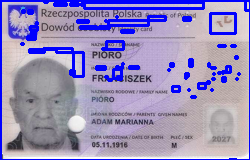

In [18]:
print('Original Format Image')
Image.fromarray(oryginal)

Tampered Format Image


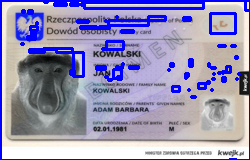

In [19]:
print('Tampered Format Image')
Image.fromarray(bogus)

Difference Image


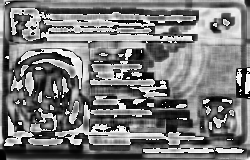

In [20]:
print('Difference Image')
Image.fromarray(diff)

Threshold Image


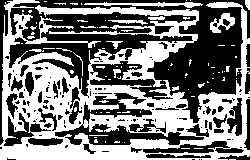

In [21]:
print('Threshold Image')
Image.fromarray(thresh)